In [1]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("notebook")

In [2]:

df_lsl = pd.read_csv('./lsl_results.csv')
df_lsl['timestamp'] = df_lsl['timestamp'] + df_lsl['offset']
df_lsl.drop(columns=['offset'], inplace=True)
df_lsl['timestamp_diff'] = df_lsl['timestamp'].diff().fillna(0)
df_lsl = df_lsl[df_lsl['timestamp'] > 2645]
# Drop last row
df_lsl = df_lsl[:-1]
print(df_lsl.shape)
df_lsl.head()



FileNotFoundError: [Errno 2] No such file or directory: './lsl_results.csv'

In [ ]:
df_sensor = pd.read_csv('./sensor_results.csv')
df_sensor = df_sensor[df_sensor['value'].str.lower() == 'a']
df_sensor['timestamp_diff'] = df_sensor['timestamp'].diff().fillna(0)
df_sensor = df_sensor[df_sensor['timestamp'] > 2645]
df_sensor = df_sensor[df_sensor['timestamp_diff'] > 0.05]
print(df_sensor.shape)
df_sensor.head()


(956, 3)


,timestamp,value,timestamp_diff
45,2645.065219,a,0.099994
46,2645.215253,A,0.150034
47,2645.315267,a,0.100013
48,2645.465150,A,0.149883
49,2645.565334,a,0.100184


<Axes: >

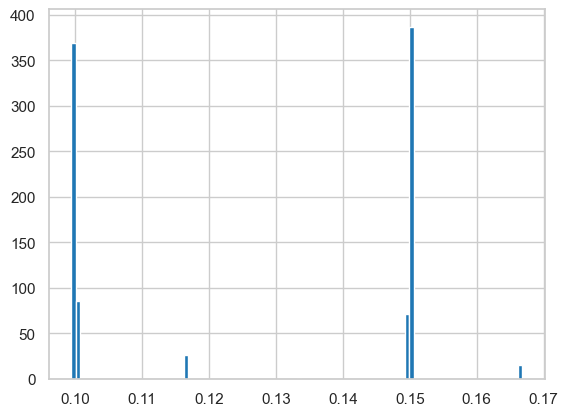

In [ ]:
df_sensor['timestamp_diff'].hist(bins=100)

In [ ]:
df_sensor.tail()

,timestamp,value,timestamp_diff
1002,2764.582846,A,0.150071
1003,2764.699423,a,0.116577
1004,2764.849657,A,0.150234
1005,2764.949554,a,0.099897
1006,2765.099603,A,0.150050


In [ ]:
df_lsl.tail()

,timestamp,value,timestamp_diff
994,2764.541573,A,0.150609
995,2764.642283,a,0.100709
996,2764.792894,A,0.150611
997,2764.893588,a,0.100694
998,2765.044185,A,0.150598


<Axes: ylabel='Count'>

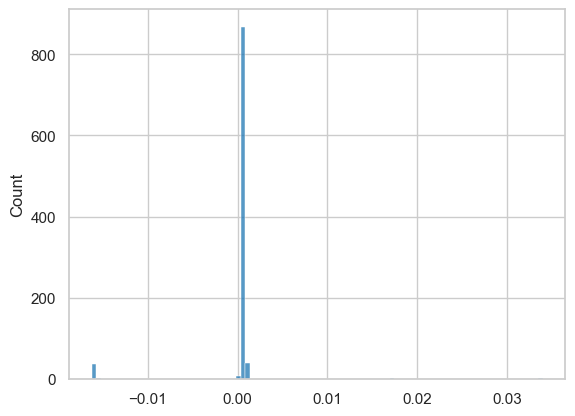

In [ ]:
delays = df_lsl['timestamp_diff'].to_numpy() - df_sensor['timestamp_diff'].to_numpy() 
sns.histplot(delays, bins=100)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyxdf

%matplotlib inline

In [435]:
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test_run-001_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test_run-002_eeg.xdf'
fpath = './results/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-test-120_run-003_eeg.xdf'
fpath = "D:\Documents\CurrentStudy\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-Default_run-001_eeg.xdf"
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test-120_run-001_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test-120_run-004_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test-120_run-007_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test-120-nogc_run-001_eeg.xdf'
fpath = 'results\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-test-120_run-008_eeg.xdf'

fpath = "D:\Documents\CurrentStudy\sub-P001\ses-S001\eeg\sub-P001_ses-S001_task-Default_run-001_eeg.xdf"
streams, header = pyxdf.load_xdf(fpath)

for stream in streams:
    print(stream['info']['name'])

['PhaseMarkers']
['SequenceStream']
['ScreenSequenceStream']
['ScreenSensorStream']


In [436]:
# Get sequence stream by name
sequence_stream = [s for s in streams if s['info']['name'][0] == 'SequenceStream'][0]
screen_sequence_stream = [s for s in streams if s['info']['name'][0] == 'ScreenSequenceStream'][0]
sensor_stream = [s for s in streams if s['info']['name'][0] == 'ScreenSensorStream'][0]
phase_stream = [s for s in streams if s['info']['name'][0] == 'PhaseMarkers'][0]

In [437]:
exp_start_time = phase_stream['time_stamps'][2]
exp_start_time

np.float64(19248.573330770443)

## Sequence jitter

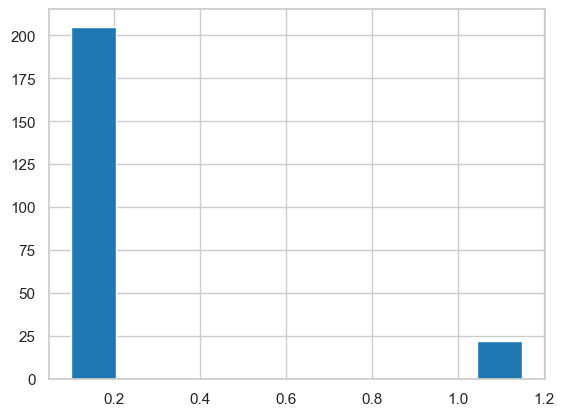

In [438]:
%matplotlib inline
timestamps = sequence_stream['time_stamps']
timeseries = sequence_stream['time_series']

timestamps = timestamps[timestamps >= exp_start_time]
timestamps_diff = np.diff(timestamps)
plt.hist(timestamps_diff)
plt.show()
# Ignore wait times
timestamps_diff = timestamps_diff[timestamps_diff < 0.5]
timestamps_diff_ms = timestamps_diff * 1000

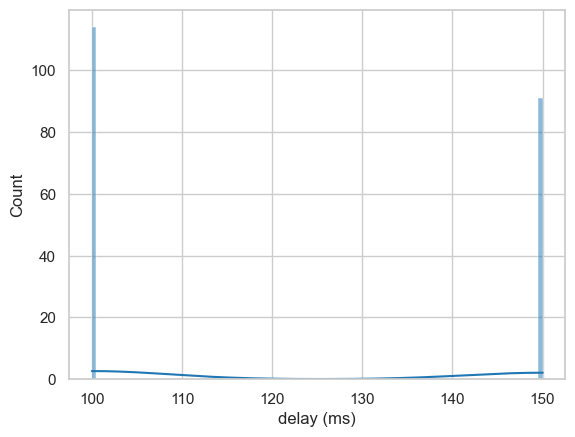

In [439]:
sns.histplot(x=timestamps_diff_ms, bins=100, kde=True)
plt.xlabel('delay (ms)')
plt.show()

In [440]:
timestamps_diff_ms

array([100.00091031, 150.00481546,  99.99271031, 150.00301546,
       100.00061031, 150.00541547,  99.99731031,  99.99641031,
       150.00031547,  99.99901031, 150.00201546, 100.00071031,
       150.00181547,  99.99751031, 150.00411546, 100.00181031,
        99.99511031, 150.00241547, 100.00051031, 149.99801547,
       100.00231031, 150.00231547, 100.00011031, 149.99741546,
        99.99811031, 100.03391031, 149.98461547,  99.99811031,
       150.00241547, 100.00391031, 149.99581547,  99.99781031,
       149.99921546, 100.00131031,  99.99981031, 150.00151547,
       100.00471031, 149.99741546, 100.00201031, 150.00111547,
        99.99811031, 149.99561547, 100.00511031,  99.99951031,
       150.01811546,  99.98291031, 150.00631546, 100.00041031,
       150.00081547, 100.00071031, 150.00131547, 100.00101031,
        99.99481031, 150.00151546,  99.99941031, 150.00111546,
       100.00571032, 150.00051546, 100.00001031, 149.99721546,
       100.00331031,  99.99411031, 150.00571547, 100.00

In [441]:
# on_timestamps_diff = timestamps_diff[timestamps_diff < 0.13] - 0.1
# off_timestamps_diff = timestamps_diff[timestamps_diff > 0.13] - 0.15
# delays = np.concatenate((on_timestamps_diff, off_timestamps_diff))
# print(delays.shape)

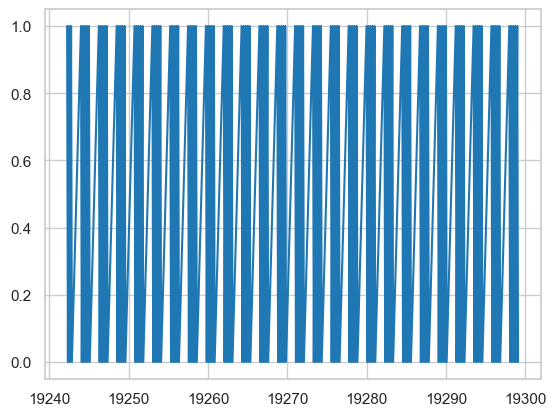

In [442]:
timestamps = sequence_stream['time_stamps']
timeseries = sequence_stream['time_series']
timeseries = timeseries[:, 0]
plt.plot(timestamps, timeseries)
plt.show()

# Sensor jitter

In [443]:
timestamps = sensor_stream['time_stamps']
timeseries = sensor_stream['time_series']
# Get timestamps within sequence stream time range
timeseries = timeseries[timestamps >= exp_start_time]
timestamps = timestamps[timestamps >= exp_start_time]



In [444]:
%matplotlib inline

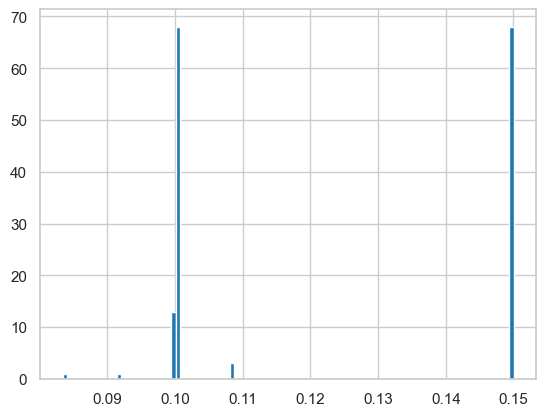

In [445]:
%matplotlib inline
timestamps_diff = np.diff(timestamps)
plt.hist(timestamps_diff[timestamps_diff < 0.3], bins=100)
plt.show()

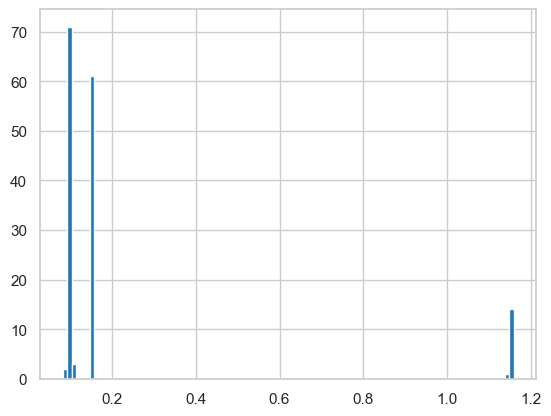

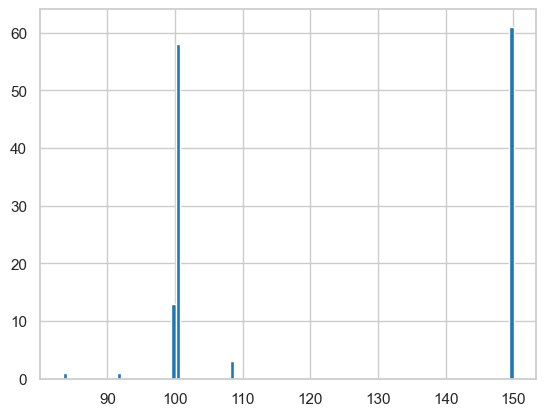

In [446]:

# Ignore first 20 (warmup)
timestamps_diff = timestamps_diff[20:]
plt.hist(timestamps_diff, bins=100)
plt.show()
timestamps_diff = timestamps_diff[timestamps_diff < 0.5]
timestamps_diff_ms = timestamps_diff * 1000
plt.hist(timestamps_diff_ms, bins=100)
plt.show()

In [448]:
(timestamps_diff * 1000).round()

array([150., 100., 100., 150., 100., 150., 100., 150., 100., 150., 100.,
       100., 150., 100., 150., 100., 150., 100., 150., 100., 100., 150.,
       100., 150., 100., 150., 100., 150., 108., 108., 150., 100., 150.,
       100., 150., 100., 150., 100., 100., 150., 100., 150., 100., 150.,
       100., 150., 100., 100., 150., 100., 150., 100., 150., 100., 150.,
       100., 100., 150., 100., 150., 100., 150., 100., 150., 100., 100.,
       150., 100., 150., 100., 150., 100., 150., 100., 100., 150., 100.,
       150.,  83., 150., 100., 150., 100., 100., 150., 100., 150., 100.,
       150., 100., 150., 100., 100., 150., 100., 150., 100., 150., 100.,
       150., 100., 100., 150., 100., 150., 100., 150., 100., 150., 100.,
       100., 150., 100., 150., 100., 150., 100., 150., 100., 100., 150.,
       100., 150., 100., 150., 100., 150., 100.,  92., 150., 100., 150.,
       108., 150., 100., 150., 100.])

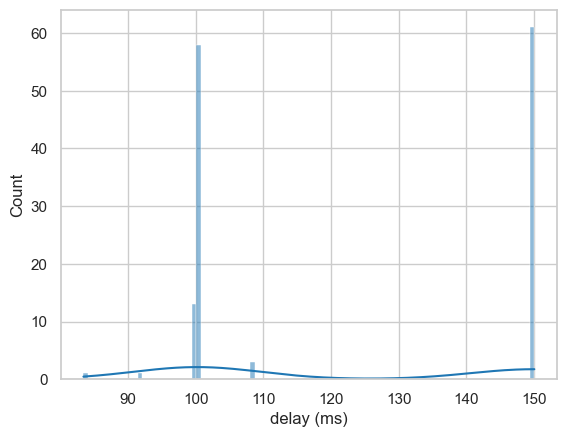

In [449]:
sns.histplot(x=timestamps_diff_ms, bins=100, kde=True)
plt.xlabel('delay (ms)')
plt.show()

In [451]:
(timestamps_diff * 1000).round()

array([150., 100., 100., 150., 100., 150., 100., 150., 100., 150., 100.,
       100., 150., 100., 150., 100., 150., 100., 150., 100., 100., 150.,
       100., 150., 100., 150., 100., 150., 108., 108., 150., 100., 150.,
       100., 150., 100., 150., 100., 100., 150., 100., 150., 100., 150.,
       100., 150., 100., 100., 150., 100., 150., 100., 150., 100., 150.,
       100., 100., 150., 100., 150., 100., 150., 100., 150., 100., 100.,
       150., 100., 150., 100., 150., 100., 150., 100., 100., 150., 100.,
       150.,  83., 150., 100., 150., 100., 100., 150., 100., 150., 100.,
       150., 100., 150., 100., 100., 150., 100., 150., 100., 150., 100.,
       150., 100., 100., 150., 100., 150., 100., 150., 100., 150., 100.,
       100., 150., 100., 150., 100., 150., 100., 150., 100., 100., 150.,
       100., 150., 100., 150., 100., 150., 100.,  92., 150., 100., 150.,
       108., 150., 100., 150., 100.])

In [452]:
%matplotlib qt
timestamps = sequence_stream['time_stamps']
timeseries = sequence_stream['time_series']
timeseries = timeseries[:, 0]

timeseries = timeseries[timestamps >= exp_start_time]
timestamps = timestamps[timestamps >= exp_start_time]

timestamps_sensor = sensor_stream['time_stamps']
timeseries_sensor = sensor_stream['time_series']
timeseries_sensor = timeseries_sensor[timestamps_sensor >= exp_start_time]
timestamps_sensor = timestamps_sensor[timestamps_sensor >= exp_start_time]
print(timeseries)
plt.plot(timestamps, timeseries, label='lsl')
plt.plot(timestamps_sensor, timeseries_sensor, label='sensor')
plt.legend()
plt.show()

[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0]


In [118]:
np.diff(timestamps_sensor - timestamps_sensor[0])

array([0.0664414 , 0.45854749, 0.0165199 , 0.0167053 , 0.0167388 ,
       0.0165004 , 0.0167478 , 0.016726  , 0.0164995 , 0.016718  ,
       0.0167484 , 1.00837207, 0.0167172 , 0.0249725 , 0.016499  ,
       0.0167468 , 0.0167337 , 0.0164926 , 0.0167441 , 0.0167373 ,
       0.0167162 , 1.01681197, 0.0164646 , 0.0167299 , 0.0167432 ,
       0.0164986 , 0.0167248 , 0.0165195 , 0.0167306 , 0.0167052 ,
       0.016743  , 1.01691447, 0.0164855 , 0.0164949 , 0.0167673 ,
       0.0166841 , 0.0167512 , 0.0164753 , 0.0167194 , 0.0167584 ,
       0.0167194 , 1.01679147, 0.0165214 , 0.0167123 , 0.016777  ,
       0.0164532 , 0.0167499 , 0.0164796 , 0.0169667 , 0.0165484 ,
       0.0166746 , 1.01670927, 0.016673  , 0.0165191 , 0.0167277 ,
       0.0167267 , 0.0334585 , 0.0165061 , 0.0167049 , 1.03356387,
       0.0164549 , 0.0165182 , 0.0169524 , 0.0332272 , 0.0167196 ,
       0.0165024 , 0.0167214 ])

In [119]:
import pyglet
from ctypes import c_int, byref

max_samples = c_int()
pyglet.gl.glGetIntegerv(pyglet.gl.GL_MAX_SAMPLES, byref(max_samples))

print(f"maximum samples: {max_samples.value}")

maximum samples: 64


<Axes: >

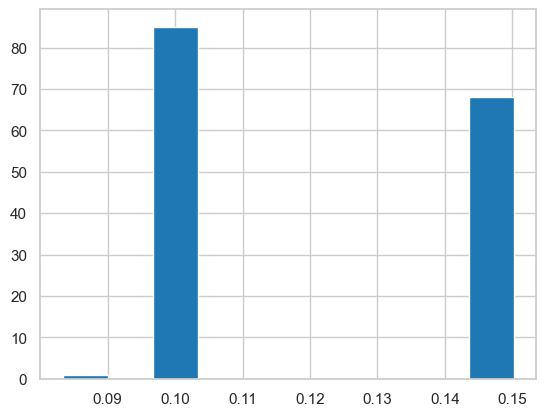

In [456]:
%matplotlib inline
timestamps = pd.read_csv('./flash_events_20250429_184734.csv')
timestamps_diff = timestamps['Timestamp (seconds)'].diff()
timestamps_diff = timestamps_diff[timestamps_diff < 0.3]
timestamps_diff = timestamps_diff[timestamps_diff > 0.05]
timestamps_diff.hist()

In [398]:
timestamps['Timestamp (seconds)'].diff().tolist()

[nan,
 0.015363100001195562,
 0.01690739999867219,
 0.03824160000112897,
 0.016608599999017315,
 0.01660520000041288,
 0.017157800000859424,
 0.017747799998687697,
 0.017198999999891385,
 0.016928500001085922,
 0.016932700000324985,
 0.016950100000030943,
 0.016983399998935056,
 0.016961200000878307,
 0.017017799998939154,
 0.016731900001104805,
 0.017181499999423977,
 0.016901999999390682,
 0.016964899999948102,
 0.016901900000448222,
 0.01698240000041551,
 0.01695110000036948,
 0.017019099999743048,
 0.016950100000030943,
 0.016661999999996624,
 0.01719020000018645,
 0.016951800000242656,
 0.016964299999017385,
 0.01695359999939683,
 0.016957499999989523,
 0.016959400001724134,
 0.01695369999833929,
 0.016955200000666082,
 0.01693379999960598,
 0.016971000000921777,
 0.017000899999402463,
 0.01690229999985604,
 0.017022899999574292,
 0.01689540000006673,
 0.016992700000628247,
 0.016905599999518017,
 0.01695060000020021,
 0.017159500001071137,
 0.016867599999386584,
 0.01687809999930